# 비용 민감 모델
---
- 위음성 비용과 위양성 비용을 다르게 설정하는 모델
- 즉, `위음성 비용 = w x 위양성 비용 (w > 1) 로 설정한 모델`을 비용민감 모델이라 한다.
    - w = 1 이면 일반 모델과 다를 것이 없음.
    - w < 1 이면 다수 클래스에 더 초점을 두는 모델이 되버림 (불균형 해소 목적과 맞지 않음)<br><br>
- w값의 조절을 통해 소수 클래스에 중점을 얼마나 둘지 설정할 수 있다.
    - 아래 그림과 같이 비용 민감 모델은 w값이 커질수록 긍정 클래스로 분류하고자 할 것이다. (재현율 상승, 정확도 하락)

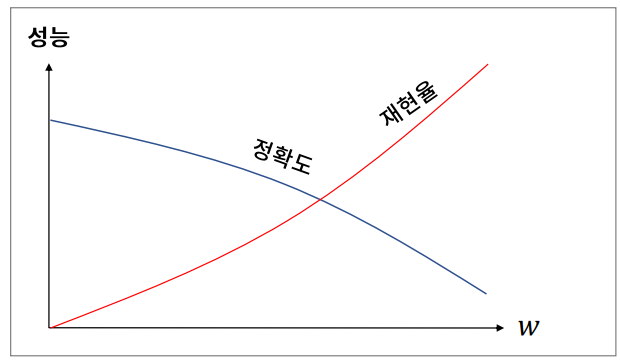


- w가 0일때는 정확도가 높은 편이다. (부정 클래스샘플이 대부분일때, 전부 부정클래스로 판단해도 성능이 나빠지지 않는다.)
- w가 0일때는 모든 샘플을 부정 클래스로 분류해서 재현율이 0이 된다. 
- 단, 재현율은 1이 될 수 있지만, 정확도는 0이 되지 않는다.
    - w가 커질 수록 대부분의 샘플을 긍정 클래스로 분류하겠지만, 실제 긍정인 비율이 있기 때문에 0이 될 수 없다.
---
- `위양성 비용 (False positive : TP)` : `부정` 클래스 샘플을 `긍정` 클래스 라고 잘못 분류해서 발생하는 비용<br><br>
- `위음성 비용 (False negative : TN)` : `긍정` 클래스 샘플을 `부정` 클래스 라고 잘못 분류해서 발생하는 비용<br><br>
---

- 기본적으로 모델을 생성하면 위음성 비용과 위양성비용을 같다는 전제하에 작동한다.
- 하지만, 실제로는 위음성 비용 > 위양성 비용 (feat. 암환자의 생명 > 정상인의 금전적 비용과 시간)
---
- 엄밀히 말해서 전처리 함수는 아니다.
- 하지만 클래스 불균형 문제 해결에 많이 쓰이는 모델 기법이다.
---

# 확률 모델
---
- Logistic Regression, Naive bayes regression 등의 확률 모델들은 cut-off value(c)를 조정하는 방식으로 비용민감 모델을 구현한다.

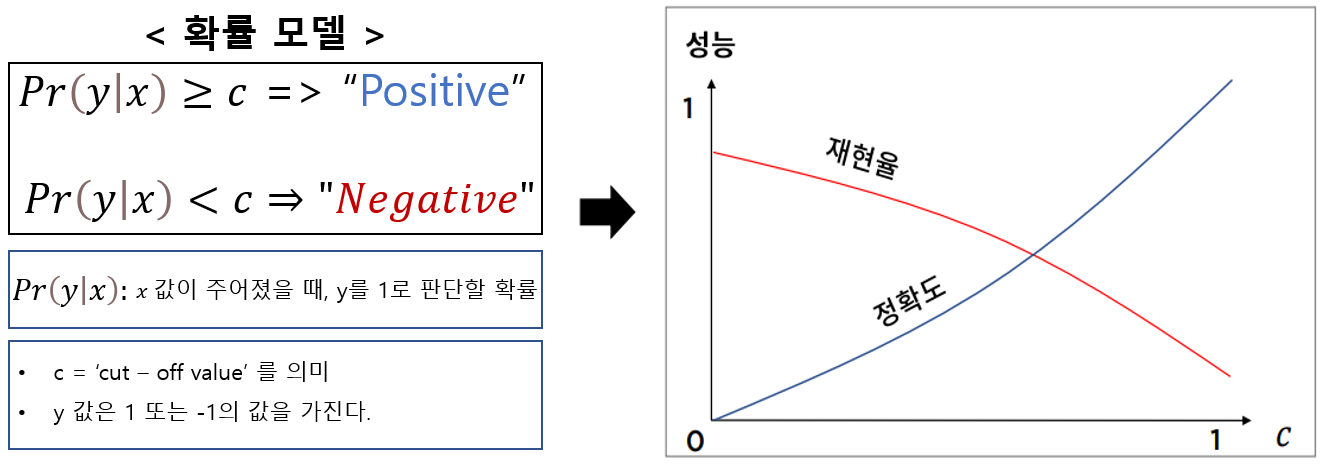

---
- 보통 c(cut-off value)를 0.5로 설정한다. 
- x가 주어졌을때 y가 1일 확률이 50%이상(c)이면 Positive(1) / y가 1일 확률이 50%이하(c)이면 Negative(-1)로 판단한다.
- 이때, c값은 조정이 가능하다. 
    - c값을 작게 줄 수록 Positive(긍정) 이라 분류하는 경우가 더 많아진다. (= 긍정 클래스의 결정 공간이 넓어진다.)

- 결론적으로, c값을 0.5보다 작게 설정하는 것을 확률모델의 비용민감 모델이라 한다.
    - c값이 작을 수록 재현율이 높고, 정확도가 낮다.

# 관련 문법 : .predict_proba
---
- sklearn의 확률 모델이 갖는 메서드로, X를 입력받아 `각 클래스에 속할 확률을 출력`해준다.
- 이전의 다른 전처리법 처럼 모델에 학습시키는 것이 아닌, 학습된 모델에서 활용하는 방식
- 모델에 값을 fit한 후에, predict_proba(X)를 사용하면, x에 포함된 모든 값들을 대상으로 Pos 와 Neg에 속할 확률을 출력해준다.
---

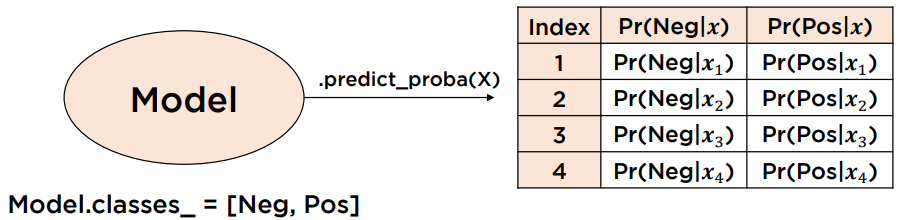

---
- Model.classes_=[Neg, Pos] 를 통해 모델학습에 사용된 클래스값을 알수 있다.
- 이 결과를 .predict_proba(X) 의 출력결과의 컬럼값으로 활용한다.
---

# 데이터 로드 및 클래스 불균형 탐색

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

반도체 공정의 센서값 데이터 (실습용 불균형 데이터)

In [2]:
df = pd.read_csv("Secom.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X582,X583,X584,X585,X586,X587,X588,X589,X590,Y
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


In [3]:
# 특징과 라벨 분리
X = df.drop('Y', axis = 1)
Y = df['Y']

In [4]:
# 학습 데이터와 평가 데이터 분할
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [5]:
# 특징이 매우 많음(590개)
Train_X.shape

(1175, 590)

In [6]:
# 클래스 불균형 확인
# 불량이 1094개 / 정상이 81개
# class 1의 샘플이 너무 적어, 언더샘플링을 적용하기에는 부적절 
Train_Y.value_counts()

-1    1094
 1      81
Name: Y, dtype: int64

In [7]:
# 클래스 불균형 비율 계산
Train_Y.value_counts().iloc[0] / Train_Y.value_counts().iloc[-1]

13.506172839506172

In [8]:
# kNN을 사용한 클래스 불균형 테스트
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *

# 모델 생성
kNN_model = KNN(n_neighbors = 11).fit(Train_X, Train_Y)

# 예측
pred_Y = kNN_model.predict(Test_X)

# 재현율 출력
print(recall_score(Test_Y, pred_Y))

# 정확도 출력
print(accuracy_score(Test_Y, pred_Y))

# 정확도는 90%이상이지만, 재현율이 0%로 불균형이 심각한 수준이다.

0.0
0.9413265306122449


# 비용 민감 모델
---
- Logistic Regression모델로 테스트 하는 이유<br><br>
    - 모델이 가볍고 간단한 구조이다.
    - 따라서 max_iter을 크게 잡아도 빠른 시간안에 결론이 도출되고, 과적합에 걸릴 가능성도 매우 낮다.    

In [9]:
# 비용 민감 모델 적용전 Logistic Regression 모델로 테스트
from sklearn.linear_model import LogisticRegression as LR

# 모델 인스턴스 생성 & fitting
model = LR(max_iter = 100000).fit(Train_X, Train_Y)

# 예측
pred_Y = model.predict(Test_X)

# 재현율 & 정확도 출력
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.21739130434782608
0.875


- 동일한 데이터 셋으로 KNN을 통해 클래스 불균형 탐색을 했을때는 재현율이 0%였던 것에 비해 로지스틱은 KNN대비 높은 재현율값을 보인다. 
    - 20%대의 재현율이 높은 것은 아니다. (상대적으로 높은 것)
- 즉, KNN모델이 클래스 불균형에 매우 민감한 모델인 것을 확인할 수 있다.

# cut-off value 조정
---
- 확률 모델의 cut_off_value 조절하기
- Numpy와 Pandas의 유니버셜 함수, 브로드캐스팅, 마스크 연산을 통해 배열 단위 연산을 하는 것이 포인트

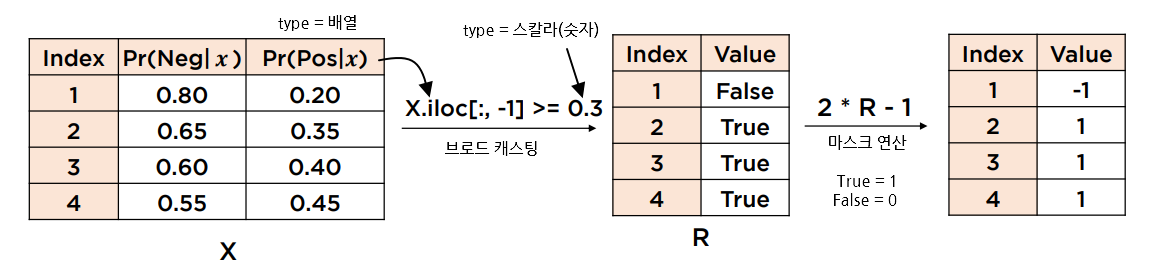

---

In [10]:
# 위에서 생성한 LR모델에 predict_proba() 함수를 사용해 해당 모델을 통해 Test_X의 샘플이 각 클래스에 속할 확률을 출력
probs = model.predict_proba(Test_X)

# 결과를 DataFrame으로 변경
# model.classes_ 는 fitting이 된 이후에만 사용 가능 (어떤 클래스를 바탕으로 학습된 것인지를 저장하는 함수)
probs = pd.DataFrame(probs, columns = model.classes_)

# cut-off value 비율 설정
cut_off_value = 0.3

pred_Y = 2 * (probs.iloc[:, -1] >= cut_off_value) - 1
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.391304347826087
0.875


- 재현율은 거의 40%가까이 증가한 반면, 정확도는 동일하다.
- 이 경우는 c값의 조절이 어느정도 잘 이뤄진 결과 이다.
- 하지만 위와 같이 처음 정한 c값이 좋은 결과를 내지 못할 수도 있고, 매번 수치를 입력해가면서 결과를 확인하는 것은 비효율 적이다.
- 따라서 함수를 활용해 cut-off value를 조정하는 결과를 시각화 하는 방법을 아래에 정리하겠다.

# cut-off value를 변화하여 비용 민감 모델 성능 올리기

In [11]:
# cut off value를 조정하는 함수 작성
def cost_sensitive_model(model, cut_off_value, Test_X, Test_Y):
    
    # predict_proba 로 클래스별 확률 출력
    probs = model.predict_proba(Test_X)
    
    # 결과값을 DataFrame으로 변경
    probs = pd.DataFrame(probs, columns = model.classes_)
    
    # cut-off value에 따른 예측값
    pred_Y = 2 * (probs.iloc[:, -1] >= cut_off_value) - 1
    
    # 재현율 * 정확도 계산
    recall = recall_score(Test_Y, pred_Y)
    accuracy = accuracy_score(Test_Y, pred_Y)
    
    # 출력
    return recall, accuracy

- 위의 과정을 하나의 함수로 만들어서 cut-off value 변화에 따른 결과를 간편하게 살펴보면서, 최적의 값을 찾도록 할 수 있다.
- 기존의 다른 전처리법은 모델을 학습한 이후에 조정을 하고, 다시 모델에 학습시키는 과정을 반복한다.
- 하지만 cut-off value의 경우 이미 학습된 모델이 있고, c값만 조정하기 때문에 작업 과정에 시간이 많이 소비되지 않는다.

# cut off value에 따른 recall과 accuracy 변화를 시각화 하기

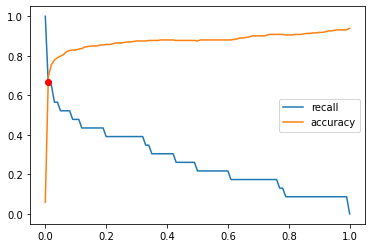

In [18]:
from matplotlib import pyplot as plt
from shapely.geometry import LineString
import numpy as np

# x축
cut_off_value_list = np.linspace(0, 1, 101) # 0부터 1까지 총 101개의 값을 list로 입력

# y축 (재현율 & 정확도)
recall_list = []
accuracy_list = []

# 생성한 cost_sensitive_model 모델로 x축값에 따른 y축의 값 출력
for c in cut_off_value_list:
    recall, accuracy = cost_sensitive_model(model, c, Test_X, Test_Y)
    recall_list.append(recall)
    accuracy_list.append(accuracy)

# 결과 시각화
%matplotlib inline    
plt.plot(cut_off_value_list, recall_list, label = 'recall')   
plt.plot(cut_off_value_list, accuracy_list, label = 'accuracy')    

# 교차점 찾기
line_1 = LineString(np.column_stack((cut_off_value_list, recall_list)))
line_2 = LineString(np.column_stack((cut_off_value_list, accuracy_list)))
intersection = line_1.intersection(line_2)

plt.plot(*intersection.xy,'ro')
plt.legend()

- 결과값을 보고 재현율과 정확도를 보면서 분석가가 원하는 수준의 값을 지정해야 한다. (주관적 판단)
- 가장 무난한 수치는 두 그래프가 교차하는 지점을 선택하는 것이다.